In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

## Домашнее Задание  №3

### Обработка текстов. Линейная классификация.

В задании вам предоставлены реальные текстовые данные. 

Необходимо построить алгоритм, который будет по тексту документа определять тип источника:
 - Микроблоги
 - Новости
 - Отзывы
 - Форумы
 - Блоги
 - Видео
 - Мессенджеры

## Часть 1. Работа с текстовыми данными

 ### 1. Исследование данных

[2 балла]

Считаем данные

In [0]:
D = pd.read_csv('texts_dataset.csv', error_bad_lines=False, sep=';', index_col=0)

In [6]:
D.head()

,Дата,ID сообщения,Заголовок,Текст,Дублей,Тип источника
0,27.04.2019 13:18,1396238,NaN,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",1.0,Микроблоги
1,27.04.2019 13:15,1396239,NaN,Почему Немагия сделала обзор на Тинькова? #нем...,1.0,Микроблоги
2,27.04.2019 13:10,1396248,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",2.0,Новости
3,27.04.2019 13:06,1396243,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",2.0,Новости
4,27.04.2019 13:03,1396186,Тинькофф Страхование: Не купить полис без подп...,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,1.0,Отзывы


Далее будем использовать лишь поля  "Текст", "Тип источника"

In [0]:
D = D[[ "Текст", "Тип источника"]]

In [8]:
D.head()

,Текст,Тип источника
0,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",Микроблоги
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги
2,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",Новости
3,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",Новости
4,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы


In [9]:
for i in D['Тип источника'].unique():
    print (i)

Микроблоги
Новости
Отзывы
Форумы
Блоги
Видео
Мессенджеры
nan


In [10]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200206 entries, 0 to 200205
Data columns (total 2 columns):
Текст            199578 non-null object
Тип источника    199993 non-null object
dtypes: object(2)
memory usage: 4.6+ MB


Удалим объекты с пропусками

In [0]:
D.dropna(axis = 0, inplace=True)

#### 1.1 Выведите среднюю длину текстов в каждом классе. Что можно сказать о данных? Что можно сказать о каждом классе?

In [0]:
D['Длина текста'] = D['Текст'].str.len()

In [13]:
D_len = D.groupby(['Тип источника'])
D_len['Длина текста'].mean()

Тип источника
Блоги          3490.849468
Видео           905.184790
Мессенджеры     943.782397
Микроблоги      170.061410
Новости        2602.342321
Отзывы          550.478565
Форумы          462.227363
Name: Длина текста, dtype: float64

Самые длинные тексты содержатся в блогах, а самые короткие - в микроблогах. В целом, классы можно разделить на следующие группы: блоги и новости - классы с наибольшей средней длиной текстов; видео и мессенджеры - средние по длине текстов; отзывы, микроблоги и форумы - с наименьшей длиной. 

#### 1.2 Приведите тексты к нижнему регистру и токенезируйте их

используйте word_tokenize из nltk.tokenize

In [14]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
D['Нижний регистр'] = D['Текст'].apply(str.lower)

In [0]:
D['Токены'] = D['Нижний регистр'].apply(nltk.word_tokenize)

In [17]:
D

,Текст,Тип источника,Длина текста,Нижний регистр,Токены
0,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",Микроблоги,65,"-здравствуйте, тинькофф банк\n-мать твою ебал\...","[-здравствуйте, ,, тинькофф, банк, -мать, твою..."
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги,108,почему немагия сделала обзор на тинькова? #нем...,"[почему, немагия, сделала, обзор, на, тинькова..."
2,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",Новости,3312,"13:01, 27.04.2019 \n\nподелиться:\n\n \n 57 ...","[13:01, ,, 27.04.2019, поделиться, :, 57, forb..."
3,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",Новости,3312,"13:01, 27.04.2019 \n\nподелиться:\n\n \n 44 ...","[13:01, ,, 27.04.2019, поделиться, :, 44, forb..."
4,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы,561,первый отзыв без оценки:&nbsp;\nhttps://www.ba...,"[первый, отзыв, без, оценки, :, &, nbsp, ;, ht..."
5,ЦитатаТинькофф Банк пишет:\nСколько еще итерац...,Форумы,526,цитататинькофф банк пишет:\nсколько еще итерац...,"[цитататинькофф, банк, пишет, :, сколько, еще,..."
6,ЦитатаТинькофф Банк пишет:\nРаботает. На следу...,Форумы,189,цитататинькофф банк пишет:\nработает. на следу...,"[цитататинькофф, банк, пишет, :, работает, ., ..."
7,ЦитатаLord01 пишет:\nЕсли в банкоматах USD нет...,Форумы,91,цитатаlord01 пишет:\nесли в банкоматах usd нет...,"[цитатаlord01, пишет, :, если, в, банкоматах, ..."
8,Столкнулся с такой ситуацией. Понадобилось сня...,Форумы,673,столкнулся с такой ситуацией. понадобилось сня...,"[столкнулся, с, такой, ситуацией, ., понадобил..."
9,"Пт, 13:00: График работы ДО ""Новая Рига"" в пер...",Блоги,5062,"пт, 13:00: график работы до ""новая рига"" в пер...","[пт, ,, 13:00, :, график, работы, до, ``, нова..."


#### 1.3 Оставьте в каждом документе токены содержащие  только буквы русского или английского алфавита.


In [0]:
import re

In [0]:
def clean(tokens):
    for token in tokens:
        if not str(token).isalpha():
            tokens.remove(token)
        elif re.findall('[^А-Яа-яA-Za-z]', str(token)):
            tokens.remove(token)
    return tokens

In [0]:
D['Токены'] = D['Токены'].apply(clean)

In [23]:
D.head()

,Текст,Тип источника,Длина текста,Нижний регистр,Токены
0,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",Микроблоги,65,"-здравствуйте, тинькофф банк\n-мать твою ебал\...","[тинькофф, банк, твою, ебал, досвидания]"
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги,108,почему немагия сделала обзор на тинькова? #нем...,"[почему, немагия, сделала, обзор, на, тинькова..."
2,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",Новости,3312,"13:01, 27.04.2019 \n\nподелиться:\n\n \n 57 ...","[поделиться, forbes, назвал, самые, экстравага..."
3,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",Новости,3312,"13:01, 27.04.2019 \n\nподелиться:\n\n \n 44 ...","[поделиться, forbes, назвал, самые, экстравага..."
4,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы,561,первый отзыв без оценки:&nbsp;\nhttps://www.ba...,"[первый, отзыв, без, оценки, nbsp, https, крат..."


#### 1.4 Выведите 20 слов, которые встечаются в наибольшем числе документов. Что можно сказать об этих словах?

In [0]:
# так как мы храним токены в множествах, нам достаточно просто 
# посчитать общую встречаемость токенов во всех текстах
d = {}
for tokens in D['Токены']:
    for token in set(tokens):
        if token not in d:
            d[token] = 0
        d[token] += 1

In [25]:
print(sorted(d.keys(), key=lambda k: d[k], reverse=True)[:20])

['в', 'и', 'на', 'не', 'тинькофф', 'с', 'банк', 'по', 'что', 'а', 'за', 'банка', 'как', 'это', 'у', 'для', 'так', 'от', 'но', 'к']


Большая часть слов - служебные слова, входящие в список стоп-слов, которые обычно не учитываются в задачах такого типа.

#### 1.5 Выведите 20 слов, которые встечаются в наименьшем числе документов 

In [26]:
print(sorted(d.keys(), key=lambda k: d[k])[:20])

['цитатапереписка', 'излагали', 'цикличный', 'заказнике', 'роботы-сумоисты', 'выселковский', 'школавсевероморске', 'аврамов', 'запсибкомбанке', 'едбо', 'успокаивающий', 'rndsc', 'зарезервировани', 'ктоблин', 'просвещаю', 'кичитесь', 'arhara', 'монетизируй', 'нестандартый', 'омрачилось']


### 2. Подготовка данных

[3 балла]

####  2.1 Разделите выборку на обучающую и тестовую в соотношении 70:30

In [0]:
def make_text(tokens):
  text = ' '.join(tokens)
  return text

In [0]:
D['Токены'] = D['Токены'].apply(make_text)

In [0]:
x_train = D['Токены'][:(int(len(D) * 0.7))]
y_train = D['Тип источника'][:(int(len(D) * 0.7))]

x_test = D['Токены'][(int(len(D) * 0.7)):]
y_test = D['Тип источника'][(int(len(D) * 0.7)):]

#### 2.2 Обучите BOW векторы на обучающей выборке и примените преобразование к обучающей и тестовой

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
bow = CountVectorizer()
train_bow = bow.fit_transform(x_train)

In [0]:
test_bow = bow.transform(x_test)

#### 2.3 Обучите TFIDF векторы на обучающей выборке и примените преобразование к обучающей  и тестовой

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(x_train)

In [0]:
test_tfidf = tfidf.transform(x_test)

#### 2.4 Примените стемминг к текстам обучающей и тестовой выборки. Обучите TFIDF векторы на полученных данных.

In [0]:
from nltk.stem.snowball import SnowballStemmer

In [0]:
STEMMER = SnowballStemmer('russian')


def stm(text):
  text_stemmed = [STEMMER.stem(w) for w in text.split()]
  return ' '.join(text_stemmed)

In [0]:
D['Стемминг'] = D['Токены'].apply(stm)

In [53]:
D.head()

,Текст,Тип источника,Длина текста,Нижний регистр,Токены,Стемминг
0,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",Микроблоги,65,"-здравствуйте, тинькофф банк\n-мать твою ебал\...",тинькофф банк твою ебал досвидания,тинькофф банк тво еба досвидан
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги,108,почему немагия сделала обзор на тинькова? #нем...,почему немагия сделала обзор на тинькова немаг...,поч немаг сдела обзор на тиньков немаг тиньк б...
2,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",Новости,3312,"13:01, 27.04.2019 \n\nподелиться:\n\n \n 57 ...",поделиться forbes назвал самые экстравагантные...,подел forbes назва сам экстравагантн инвестиц ...
3,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",Новости,3312,"13:01, 27.04.2019 \n\nподелиться:\n\n \n 44 ...",поделиться forbes назвал самые экстравагантные...,подел forbes назва сам экстравагантн инвестиц ...
4,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы,561,первый отзыв без оценки:&nbsp;\nhttps://www.ba...,первый отзыв без оценки nbsp https кратко суть...,перв отз без оценк nbsp https кратк сут не уда...


In [0]:
train_st = D['Стемминг'][:(int(len(D) * 0.7))]
test_st = D['Стемминг'][(int(len(D) * 0.7)):]

In [0]:
tfidf = TfidfVectorizer()
train_st_tfidf = tfidf.fit_transform(train_st)

In [0]:
test_st_tfidf = tfidf.transform(test_st)

#### 2.5 Сравните размеры полученных матриц

In [61]:
print('Размеры BOW:', train_bow.shape, test_bow.shape)
print('Размеры TFIDF:', train_tfidf.shape, test_tfidf.shape)
print('Размеры TFIDF при стемминге:', train_st_tfidf.shape, test_st_tfidf.shape)

Размеры BOW: (139697, 267651) (59871, 267651)
Размеры TFIDF: (139697, 267651) (59871, 267651)
Размеры TFIDF при стемминге: (139697, 122342) (59871, 122342)


Как и следовало ожидать, размеры матриц BOW и TFIDF оказались одинаковыми, размеры же TFIDF уменьшились после стемминга. Это связано с тем, что словоформы, принадлежащие одной лексеме, вследствие стемминга больше не воспринимаются как различные слова.

### 3. Обучение модели и оценка результатов

[2 балла]

#### 3.1 Обучите логистическую регрессию SGDClassifier на данных, полученных в пунктах 2.2, 2.3 и 2.4.
#### Оцените качество на отложенной выборке по метрике accuracy

In [0]:
from sklearn import linear_model

In [0]:
clf = linear_model.SGDClassifier()
clf.fit(train_bow, y_train)
y_pred_bow = clf.predict(test_bow)

In [0]:
clf = linear_model.SGDClassifier()
clf.fit(train_tfidf, y_train)
y_pred_tfidf = clf.predict(test_tfidf)

In [0]:
clf = linear_model.SGDClassifier()
clf.fit(train_st_tfidf, y_train)
y_pred_st_tfidf = clf.predict(test_st_tfidf)

In [0]:
from sklearn.metrics import accuracy_score

In [82]:
pd.DataFrame([accuracy_score(y_test, y_pred_bow), accuracy_score(y_test, y_pred_tfidf),
             accuracy_score(y_test, y_pred_st_tfidf)], columns=['accuracy'],
             index=['BOW', 'TFIDF', 'TFIDF со стеммингом'])

,accuracy
BOW,0.798450
TFIDF,0.808672
TFIDF со стеммингом,0.798383


#### 3.2 Какой алгоритм показал наилучшее качество классификации? Как это можно объяснить?

Наилучшее качество показал алгоритм TFIDF. Более плохое качество при работе TFIDF со стеммингом можно объяснить не всегда корректной работой стеммера (так, например, в разных формах фамилия Тиньков превращается то в _тиньк_, то в _тиньков_).

#### 3.3 Выведите несколько документов из тестовой выборки, на которых были допущены ошибки. Что можно о них сказать?

In [0]:
x_test_ind = x_test.reset_index(drop=True)

In [114]:
ind = np.where(y_test != y_pred_tfidf)
ind = np.array(ind[0])
random_ind = np.random.randint(0, ind.shape[0] ,(10))
for i in random_ind:
    img = x_test_ind[ind[i]]
    print(img)
    print(" ")

втб рекомендация покупать целевая цена руб текущая цена руб потенциал роста инвестиционная идея втб второй крупнейший по активам и кредитам банк в россии с активами трлн руб доля государства в капитале около втб отчитался о чистой прибыли млрд превзойдя прогнозы а также решил изменить дивидендную политику мы положительно оцениваем эти новости и повышаем рекомендацию с держать до покупать и целевую цену с руб до руб потенциал роста в перспективе года чистая прибыль акционеров выросла по итогам года в раза до рентабельность собственного капитала повысилась с в году до чистые процентные доходы увеличились на чистая процентная маржа fy поднялась на до стоимость риска немного повысилась с до кредитный портфель gross к концу года вырос на за счет розничного кредитования корпоративный портфель пока остается слабым звеном отчасти вследствие смещения спроса на финансирование на мосбиржу менеджмент ожидает роста корпоративных кредитов на в этом году но мы видим риск отставания от цели и снижения

__Анализ документов__

Можно заметить, что нет никакой корреляции с размером текста - в рассматриваемой выборке представлены как большие, так и очень маленькие тексты. Однако видно, что в текстах присутствует достаточно много стоп-слов, которые могут часто встречаться в текстах любого класса, а потому не могут нести никакой информации о том, к какому классу относится текст, что, безусловно, могло повлиять на работу алгоритма.

#### 3.4 Постройте матрицу ошибок. Проанализируйте ее.

In [0]:
import sklearn
import seaborn

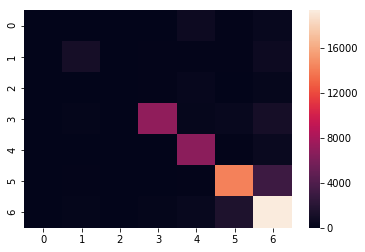

In [93]:
seaborn.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred_tfidf))

Легко заметить, что ошибки сконцентрированы на диагонали матрицы. Ошибки встречаются в классификации каждого из классов текстов. 

## Часть 2. Логистическая регрессия.
[3 балла]

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [8]:
train = pd.read_csv('train.csv')

In [10]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.
​
Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [11]:
train['price_range'] = (train['price_range'] > 1).astype(int)

In [16]:
price_range = train['price_range']
del train['price_range']

In [17]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


Разделите выборку на обучающую и тестовую части в соотношении 70:30. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train, price_range, test_size=0.3, random_state=37)

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [33]:
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?
Не забывайте, что метод predict_proba вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [36]:
import sklearn.metrics

In [55]:
LR = lm.LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_proba = LR.predict_proba(X_test)

In [68]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracy

0.98

In [39]:
roc_auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
roc_auc

0.9802518061693626

У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

In [50]:
import matplotlib.pyplot as plt

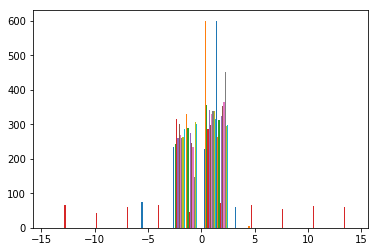

In [90]:
b = LR.intercept_ + X_test * LR.coef_
plt.hist(b)
plt.show()

Данные значения не похожи на вероятности классов, потому как они достигают даже нескольких сотен. Можно попробовать отнормировать эти значения.

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

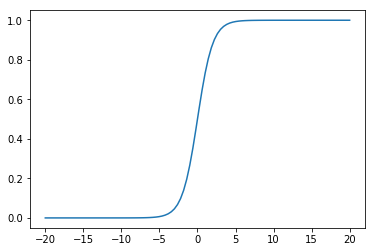

In [76]:
x = np.linspace(-20, 20, num=100)
plt.plot(x, sigmoid(x))

Сигмоида отображает любое число в [0, 1]. Сигмоида оказывается полезна при решении задач бинарной классификации, так как эту функцию можно рассматривать как вероятность принадлежности объекта к положительному классу.

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [78]:
sigmoid(b)

array([[0.85010037, 0.48082248, 0.46040098, ..., 0.44197   , 0.51688841,
        0.46283938],
       [0.75768183, 0.48082248, 0.47022937, ..., 0.4973396 , 0.45178742,
        0.50651073],
       [0.60529934, 0.48082248, 0.46285549, ..., 0.4973396 , 0.45178742,
        0.46283938],
       ...,
       [0.81006336, 0.48082248, 0.46531181, ..., 0.4973396 , 0.45178742,
        0.50651073],
       [0.06718815, 0.48782142, 0.50969787, ..., 0.4973396 , 0.45178742,
        0.46283938],
       [0.42802597, 0.48782142, 0.46285549, ..., 0.44197   , 0.51688841,
        0.50651073]])

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

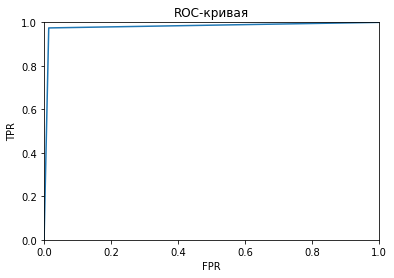

In [71]:
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_pred)

plt.title('ROC-кривая')
plt.plot(fpr, tpr)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

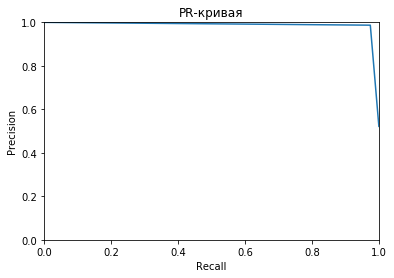

In [72]:
precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred)

plt.title('PR-кривая')
plt.plot(recall, precision)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()